In [1]:
import scipy.io
mnist = scipy.io.loadmat('/home/amogh/scikit_learn_data/mldata/mnist-original.mat')
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [2]:
X, y = mnist["data"].transpose(), mnist["label"].transpose()
X.shape

(70000, 784)

In [3]:
y.shape


(70000, 1)

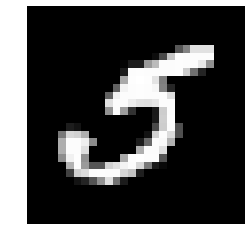

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap='gray', interpolation='nearest')
plt.axis("off")
plt.show()

In [5]:
y[36000]

array([5.])

In [6]:
X_train, X_test, y_train, y_test = X[:60000,], X[60000: ], y[:60000], y[60000: ]


In [7]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [8]:
# Training a Binary Classifier

In [9]:
y_train_5 = (y_train == 5)  # True for all 5s, False otherwise

In [10]:
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

# tol: The stopping criterion. 
# If it is not None, the iterations will stop 
# when (loss > best_loss - tol) for consecutive epochs.

sgd_clf = SGDClassifier(random_state = 42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5.ravel())

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([False])

In [13]:
# Perfomance Measures

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
y_train_5 = y_train_5.ravel()

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9644
0.9539
0.9621


In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9644, 0.9539, 0.9621])

In [16]:
from sklearn.base import BaseEstimator
import numpy as np

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") 
# prints array([0.90935, 0.91135, 0.90825])

# We got 90% accuracy because about 10% of the images are 5 so even if you
# always guess that an image is `not` a 5, you will be right about 90% of time

# Cause: skewed datasets ; Solution: Not evaluating model on `accuracy`

array([0.9109 , 0.9091 , 0.90895])

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
# prints array([[53670,   909],
#       [ 1573,  3848]])

# Precision: TP / (TP + FP) [How many instances predicted positive by the classifier are actually positive?]
# Recall:    TP / (TP + FN) [How many instances out of actual postives are actually predicted by the classifier?] 

array([[53588,   991],
       [ 1401,  4020]])

In [19]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)
# prints 0.8089131805759933
# When it claims an images represents a 5, it is correct ~81% of the time

0.8022350828178009

In [20]:
recall_score(y_train_5, y_train_pred)
# prints 0.709832134292566
# The classifier is able to only detect ~71% of the time

0.7415605976757056

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)
# F1 score is the harmonic mean of `precision` and `recall`.
# This way the classifier will be high only if both are high

0.7707055214723927

In [22]:
# the decision function method will return a score for the instance
# and make a prediction based on that score
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-983.17706457])

In [23]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [24]:
# Raising the threshold will reduce the recall
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

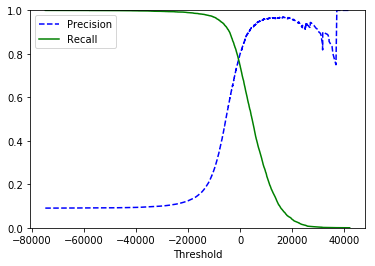

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

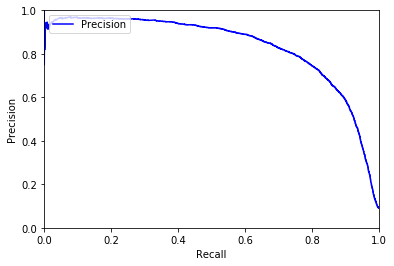

In [27]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b-", label="Precision")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.xlim([0,1])
    plt.ylim([0,1])
    
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [31]:
# Classifier with 90% precision
y_train_pred_90 = (y_scores > 7000)

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.9474929044465469

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.3694890241652832

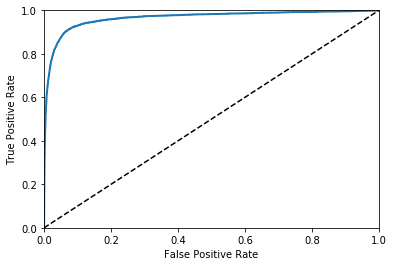

In [39]:
# The ROC curve plots true positive rate agianst the false positive rate
# True positve rate: Ratio of positive instances that are correctly identified by the classifier, also called recall
# False positive rate: Ratio of negative instances that are incorrectly identified by the classifier

# True negative rate: Ratio of negative instances that are correctly identified as negative

# TPR is also called `sensitivity`
# TNR is also called `specificity`
# FPR = 1 - TNR

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1, 0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

plot_roc_curve(fpr, tpr)
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9649164355816887

In [ ]:
# ========================================
# Note: WHEN TO USE PR CURVE AND ROC CURVE
# ========================================

# PR curve is used when the positive class 
# is rare and you care more about the false
# positives than false negatives, otherwise 
# ROC curve.

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [42]:
y_scores_forest = y_probas_forest[:, 1]     # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

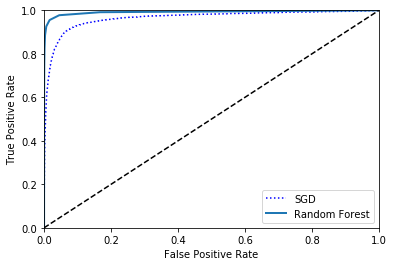

In [43]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [44]:
roc_auc_score(y_train_5, y_scores_forest)

0.9920733425817008

In [45]:
# Multiclass classification
y_train = y_train.ravel()
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

In [46]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -2418.44921972, -14775.71095951,  -5078.44970045,
         -3982.60991148, -10781.8153001 ,   -983.17706457,
        -31542.44196043, -16614.0410159 ,  -8736.50299839,
        -15736.83089926]])

In [47]:
np.argmax(some_digit_scores)
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [48]:
sgd_clf.classes_[5]

5.0

In [49]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they

/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5.])

In [50]:
len(ovo_clf.estimators_)

45

In [51]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [52]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86752649, 0.88564428, 0.873331  ])

In [55]:
# scaling the inputs will give us better results
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.86752649, 0.88564428, 0.873331  ])

In [56]:
# Error Analysis
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/amogh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5611,    0,   18,    8,    7,   45,   37,    6,  190,    1],
       [   1, 6419,   44,   20,    4,   46,    4,    8,  185,   11],
       [  25,   25, 5282,   88,   73,   29,   64,   41,  320,   11],
       [  29,   17,  123, 5269,    2,  216,   28,   42,  338,   67],
       [  14,   14,   48,    9, 5254,   10,   35,   17,  279,  162],
       [  27,   19,   30,  153,   54, 4522,   82,   16,  451,   67],
       [  30,   16,   46,    2,   37,   95, 5572,    5,  115,    0],
       [  22,   13,   52,   28,   47,   14,    6, 5719,  152,  212],
       [  14,   65,   49,   90,    2,  131,   37,    8, 5411,   44],
       [  26,   25,   30,   67,  129,   38,    1,  160,  320, 5153]])

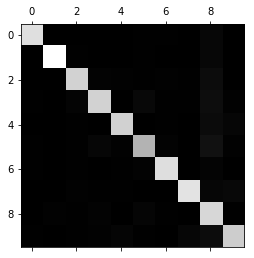

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

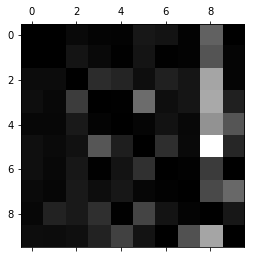

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [60]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [64]:

# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")


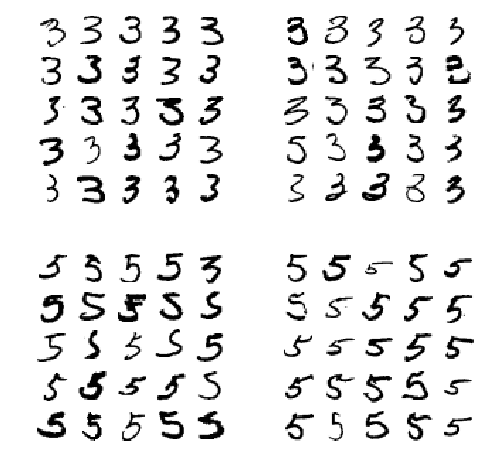

In [65]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [67]:
# Multilabel Classification
# EXAMPLE: Consider a face recognition classifier. In order to
# recognise several people on the same picture. It should attach
# one label per person it recognizes. Say there are three faces:
# Alice, Bob and Charlie, then for an image of Alice & Charlie
# it should output `[1, 0, 1]`

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
# y_multilabel is an array which has two lables
# 1. y_train_large: indicates whether or not digit is large (7, 8 or 9)
# 2. y_train_odd: indicates whether or not digit is oodd
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [70]:
knn_clf.predict([some_digit])
# prints array([[False,  True]])
# The digit is 5 is `NOT` large and `IS` odd

array([[False,  True]])

In [ ]:
# compute the average F1 score across all labels
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [ ]:
f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
# Multioutput classification
# EXERCISE: We will build a system which will remove noise from
# image, and output a clean image

noise = random.randint(0, 100, (len(X_train), 784))
noise = random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn.clf_predict([X_test_mod[100]])
plot_digit(clean_digit)